In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
y = df['target'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [18]:
#scale data for better predictions

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#define the Dense layers and activation functions

nn = tf.keras.Sequential()

nn.add(Dense(30, activation='relu'))

nn.add(Dropout(0.2))

nn.add(Dense(15, activation='relu'))

nn.add(Dropout(0.2))


nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

nn.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 686 samples, validate on 339 samples
Epoch 1/1000
686/686 [==============================] - 1s 2ms/sample - loss: 0.6697 - accuracy: 0.5525 - val_loss: 0.6038 - val_accuracy: 0.6667
Epoch 2/1000
686/686 [==============================] - 0s 163us/sample - loss: 0.6061 - accuracy: 0.6676 - val_loss: 0.5449 - val_accuracy: 0.8024
Epoch 3/1000
686/686 [==============================] - 0s 202us/sample - loss: 0.5565 - accuracy: 0.7376 - val_loss: 0.4965 - val_accuracy: 0.8289
Epoch 4/1000
686/686 [==============================] - 0s 193us/sample - loss: 0.5226 - accuracy: 0.7536 - val_loss: 0.4524 - val_accuracy: 0.8260
Epoch 5/1000
686/686 [==============================] - 0s 196us/sample - loss: 0.4863 - accuracy: 0.7799 - val_loss: 0.4160 - val_accuracy: 0.8437
Epoch 6/1000
686/686 [==============================] - 0s 172us/sample - loss: 0.4604 - accuracy: 0.7770 - val_loss: 0.3862 - val_accuracy: 0.8525
Epoch 7/1000
686/686 [==============================] - 0s 202us/sam

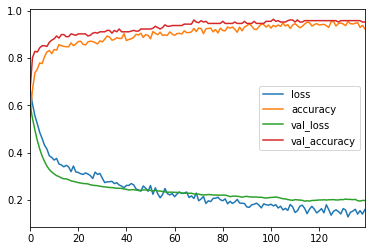

In [33]:
#plot the model loss

model_loss = pd.DataFrame(nn.history.history)
model_loss.plot()

In [34]:
predictions = nn.predict_classes(X_test)

In [41]:
#test the accuracy of the network

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       167
           1       0.95      0.96      0.95       172

    accuracy                           0.95       339
   macro avg       0.95      0.95      0.95       339
weighted avg       0.95      0.95      0.95       339

[[158   9]
 [  7 165]]


In [37]:
X_new = [[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]
X_new = scaler.transform(X_new)
nn.predict(X_new).round()

array([[0.]], dtype=float32)

In [38]:
X_new2 = [[59,1,1,140,221,0,1,164,1,0.0,2,0,2]]
X_new2 = scaler.transform(X_new2)
nn.predict(X_new2).round()

array([[1.]], dtype=float32)